# PROJECT - TO DISCOVER THE INCOME OF A CITIZEN

In [2]:
#Importing essential libraries 
import pandas as pd
import numpy as np

In [3]:
#Load dataset getting by https://www.kaggle.com/wenruliu/adult-income-dataset
dataset=pd.read_csv('adult.data', names=["age", "workclass", "fnlwgt","education","education-num",
                                         "marital status","occupation","relationship","race","sex","capital-gain",
                                        "capital-loss","hours-per-week","native-country","income"])

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous. 

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [4]:
#Visualize some datas: 6 continuous, 8 nominal attributes. 
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploratory analysis

**Distribuiton of the class**

In [6]:
#income is a binary target, it indicate the income of citizen <=50 and >50.
dataset.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [7]:
y=dataset['income'].values
import seaborn as sns
ax = sns.countplot(x=y)

**Distribuition of the education level by income**

In [8]:
education_nivel=dataset.groupby(["education", "income"]).size().sort_values(ascending=False)
education_nivel.head()

education      income
 HS-grad        <=50K    8826
 Some-college   <=50K    5904
 Bachelors      <=50K    3134
                >50K     2221
 HS-grad        >50K     1675
dtype: int64

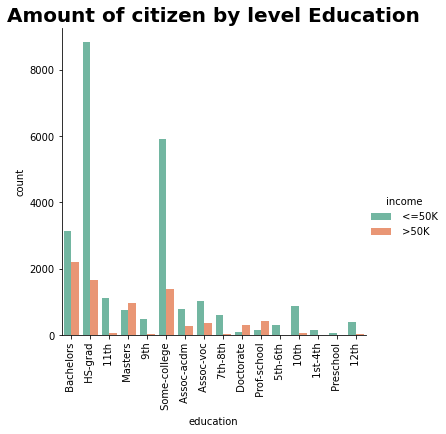

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
Graph=sns.catplot(x="education", kind="count", hue="income", palette="Set2", data=dataset)
Graph.ax.set_title('Amount of citizen by level Education', fontsize=20, weight='bold')
Graph.set_xticklabels(rotation=90)

Text(0.5, 1.0, 'Amount of citizen by Sex')

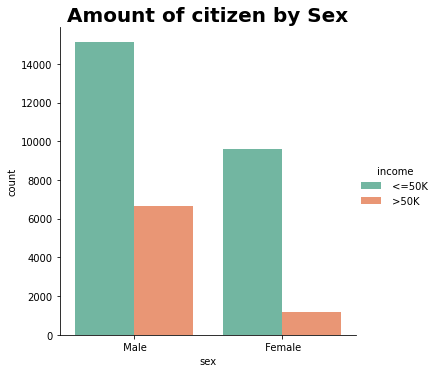

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
Graph=sns.catplot(x="sex", kind="count", hue="income", palette="Set2", data=dataset)
Graph.ax.set_title('Amount of citizen by Sex', fontsize=20, weight='bold')


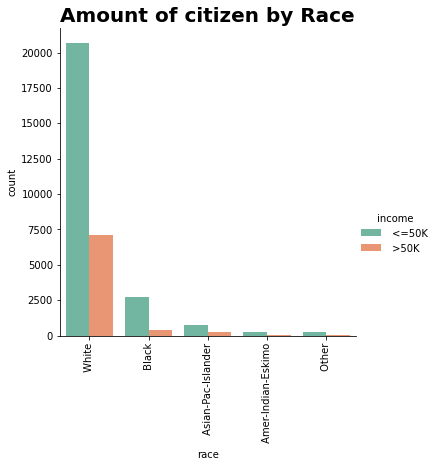

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
Graph=sns.catplot(x="race", kind="count", hue="income", palette="Set2", data=dataset)
Graph.ax.set_title('Amount of citizen by Race', fontsize=20, weight='bold')
Graph.set_xticklabels(rotation=90)

In [60]:
# Getting categorical datas by age range
categoric_list=[]

In [61]:
# Load the categorical list
for i in dataset.age.iteritems():
    value = (i[1])
    if value < 20:
        categoric_list.append('younger 20')
    elif value >= 20 and value < 30:
        categoric_list.append('20-29')
    elif value >= 30 and value < 40:
        categoric_list.append('30-39')
    elif value >= 40 and value < 50:
        categoric_list.append('40-49')
    elif value >= 50 and value <= 60:
        categoric_list.append('50-60')
    else:
        categoric_list.append('older 60')

In [62]:
# cria a coluna categorias
dataset['categoric_list'] =categoric_list

In [63]:
# imprime a contagem de categorias
dataset.categoric_list.value_counts()


30-39         8613
20-29         8054
40-49         7175
50-60         4730
older 60      2332
younger 20    1657
Name: categoric_list, dtype: int64

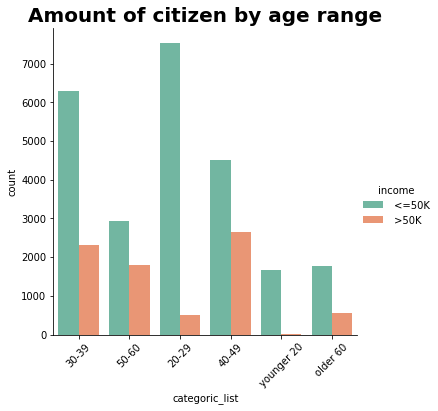

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
Graph=sns.catplot(x="categoric_list", kind="count", hue="income", palette="Set2", data=dataset)
Graph.ax.set_title('Amount of citizen by age range', fontsize=20, weight='bold')
Graph.set_xticklabels(rotation=45)

# Datas Analysis

In [65]:
#Remove column, this is no longer needed
dataset.drop(['categoric_list'], axis=1, inplace=True)

In [66]:
#And education
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0# Remove features
remove_features(['education'])

0

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [68]:
#Verifying some missing values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Comparation Label Encoder x OneHotEndoder by Train/Test

# LABEL ENCODER

In [69]:
#To convert  categorical column in numerical by Label Encoder
from sklearn.preprocessing import LabelEncoder
Features = dataset
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [70]:
Features.head()

,age,workclass,fnlwgt,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


In [76]:
# To separate and concat the dataset
y=Features.income
X=Features.drop(['income'], axis=1)

In [88]:
X.shape

(32561, 13)

In [77]:
#Train/Test the LebelEncoder by SVM
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**SVM (Support vector machine) is simple algorithm, it is highly preferred by many as produces significant accuracy with less computation power one**

In [78]:
# Training the SVM algorithm.
svm_clf = svm.SVC().fit(X_train,y_train)

In [99]:
# Outcomes and predicts.
from sklearn import metrics
y_pred2  = svm_clf.predict(X_test)

# Print the accuracy.
print('Accuracy',metrics.accuracy_score(y_test,y_pred2))

#Confusion Matrix
print(metrics.classification_report(y_test,y_pred2))

Accuracy 0.7950253339474896
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4927
           1       0.97      0.16      0.28      1586

    accuracy                           0.80      6513
   macro avg       0.88      0.58      0.58      6513
weighted avg       0.83      0.80      0.73      6513



The recall of the class 1 (>50k income) is too bad.

# ONEHOTENCODER

In [79]:
# To import package OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [80]:
# Aplicando o get_dummies nos dados.
X_one = pd.get_dummies(dataset.drop(['income'], axis=1), columns=['workclass','occupation','marital status','relationship',
                                           'race','sex','native-country'], prefix=['wo','oc','ma',
                                                                                   're','ra','sex','na'])

In [81]:
X_one.shape

(32561, 92)

In [82]:
X_one.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wo_0,wo_1,wo_2,wo_3,...,na_32,na_33,na_34,na_35,na_36,na_37,na_38,na_39,na_40,na_41
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#Train/Test the the OneHotEncoder
from sklearn.model_selection import train_test_split
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one,y, test_size=0.2, random_state=123)

In [84]:
X_test_one.shape

(6513, 92)

**Testing the model**

In [85]:
# Treinando o algoritmo de SVM.
svm_clf_one = svm.SVC().fit(X_train_one,y_train_one)

In [87]:
# Outcomes and predicts.
y_pred4  = svm_clf_one.predict(X_test_one)

# Print the accuracy.
print('Accuracy',metrics.accuracy_score(y_test_one,y_pred4))

#Confusion Matrix
print(metrics.classification_report(y_test_one,y_pred4))

Accuracy 0.7944111776447106
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4927
           1       0.97      0.16      0.28      1586

    accuracy                           0.79      6513
   macro avg       0.88      0.58      0.58      6513
weighted avg       0.83      0.79      0.73      6513



Label Encoder had accuracy to 80% and OneHotEncoder 79%, cause, we choose Label Encoder in this case.
And the Label Enconder was greater accuracy maybe by to have less amount of columns, 
13 while the OneHotEncoder had 92.

# Comparation among Train/test and cross validation

In [93]:
#using model SVM and Dataset by Label Encoder (X,y)
result_1 = cross_val_predict(svm_clf, X, y, cv=10)
#Confusion Matrix
print(metrics.classification_report(y,result_1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     24720
           1       0.97      0.16      0.27      7841

    accuracy                           0.80     32561
   macro avg       0.88      0.58      0.58     32561
weighted avg       0.83      0.80      0.73     32561



We need some kind of assurance that our model has get most of the patterns from the data correct, so is need to validate the stability of your machine learning model through of the cross validation technique.


# Stage Pre Processes

In [94]:
#To Test Pre-Processer by models - SVM and now K-Nearest-Neighboors (KNN)
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

# Crating many Pipelines
pip_1 = Pipeline([
    ('NOrmalizer', Normalizer()),
    ('clf', svm.SVC())
])
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

pip_4 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier())
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', KNeighborsClassifier())
])

pip_6 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])
pip_7 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])
pip_8 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [96]:
# Building a accuracy function to cross validation technique
from sklearn.model_selection import cross_val_predict
def Accuracy(clf,X,y):
    results = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,results)

In [97]:
Accuracy(pip_1,X,y)

0.7898406068609687

In [98]:
Accuracy(pip_2,X,y)

0.8461963698903596

In [99]:
Accuracy(pip_3,X,y)

0.8489604127637358

In [100]:
Accuracy(pip_4,X,y)

0.8241454500783145

In [101]:
Accuracy(pip_5,X,y)

0.8304106139246338

In [102]:
Accuracy(pip_6,X,y)

0.8489604127637358

In [122]:
Accuracy(pip_7,X,y)

0.8414360738306563

In [103]:
Accuracy(pip_8,X,y)

0.8147169927213538

O pip_3 is equal the pip_6 because default Kernel of the SVM is 'rbf'.

The choice of the Pip_3 was resulted of the best accuracy by preprocesser StandardScaler and Model SVM.

# Tuning SVM

In [104]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [131]:
# Lista de Valores de C
lista_C = [ 0.1, 1, 10]

# Lista de Valores de gamma
lista_gamma = [0.1, 1, 100]

#kernel=['rbf','poly','linear']
        
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [105]:
# Lista de Valores de C
lista_C = [ 0.1, 1, 10]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1]


        
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [106]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid1 = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [107]:
# Aplica o gridsearch passando os dados de treino e classes.
grid1.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [108]:
grid1.best_params_

{'clf__C': 1, 'clf__gamma': 0.1}

In [111]:
#Predcting outcomes after tuning of SVM
results_3 = cross_val_predict(grid1.best_estimator_, X, y, cv=10)

In [113]:
print('Accuracy',metrics.accuracy_score(y,results_3))

Accuracy 0.8489604127637358


In [112]:
#Presenting outcomes with confusion matrix
print(metrics.classification_report(y,results_3))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     24720
           1       0.76      0.54      0.63      7841

    accuracy                           0.85     32561
   macro avg       0.82      0.74      0.77     32561
weighted avg       0.84      0.85      0.84     32561



# Comparation among SVM with Random Forest

The ability to precisely classify observations is extremely valuable, We ussually want to know what class an observation belongs. Random forest model is a simple but powerful technique.

In [114]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier()

# Outcomes and predicts.
results_4  = cross_val_predict(random_clf, X, y, cv=10)

# Print the accuracy.
print('Accuracy',metrics.accuracy_score(y,results_4))

#Confusion Matrix
print(metrics.classification_report(y,results_4))

Accuracy 0.857375387733792
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24720
           1       0.75      0.62      0.68      7841

    accuracy                           0.86     32561
   macro avg       0.82      0.78      0.79     32561
weighted avg       0.85      0.86      0.85     32561



It already get best recall in class 1.

In [115]:
# Pre-processing dataset to Random Forest 
pip_9 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier())
])

pip_10 = Pipeline([
    ('NOrmalizer', Normalizer()),
    ('clf', RandomForestClassifier())
])
pip_11 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier())
])

In [116]:
Accuracy(pip_9,X,y)

0.8584502932956605

In [117]:
Accuracy(pip_10,X,y)

0.8414053622431743

In [118]:
Accuracy(pip_11,X,y)

0.8581738890083228

Scale the datas to Random Forest model does not improve the outcomes.

# Tuning Random Forest

In [138]:
params = {'max_depth': [4, 6, 10, 14], 
              'min_samples_split': [2, 5, 10],
#              'min_samples_leaf' : [2, 6, 10],
              'n_estimators' : [100, 200, 300, 400],
#               'max_features': ['auto','sqrt']
             }
grid2 = GridSearchCV(estimator=random_clf, param_grid = params, cv = 5)
grid2.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 10, 14],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [139]:
grid2.best_params_

{'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 400}

In [140]:
Accuracy(grid2.best_estimator_,X,y)

0.8645926107920519

**Trying to improve the tuning

In [121]:
params = {'max_depth': [12, 14,20,24], 
              'min_samples_split': [5, 10, 15],
#              'min_samples_leaf' : [2, 6, 10],
              'n_estimators' : [300, 400,500,600],
#               'max_features': ['auto','sqrt']
             }
grid3 = GridSearchCV(random_clf, params, cv = 5)
grid3.fit(X, y)

In [142]:
grid3.best_params_

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 600}

In [143]:
Accuracy(grid3.best_estimator_,X,y)

0.8657596511163662

The tuning grid3.best_estimator_ getting best accuracy

In [122]:
#Predcting outcomes after tuning of Random Forest
RF = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=600)
results_5 = cross_val_predict(RF, X, y, cv=10)

In [123]:
#Presenting outcomes with confusion matrix
print(metrics.classification_report(y,results_5))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     24720
           1       0.78      0.62      0.69      7841

    accuracy                           0.87     32561
   macro avg       0.83      0.78      0.80     32561
weighted avg       0.86      0.87      0.86     32561



Normalized confusion matrix
[[0.9440534  0.0559466 ]
 [0.38260426 0.61739574]]
TN: 23337  FP: 1383  FN: 3000  TN: 4841  FNR= 0.11390818999886092  FPR= 0.2222043701799486
Accuracy Rate: 0.8653911120665827
Misclassification Rate: 0.13460888793341727


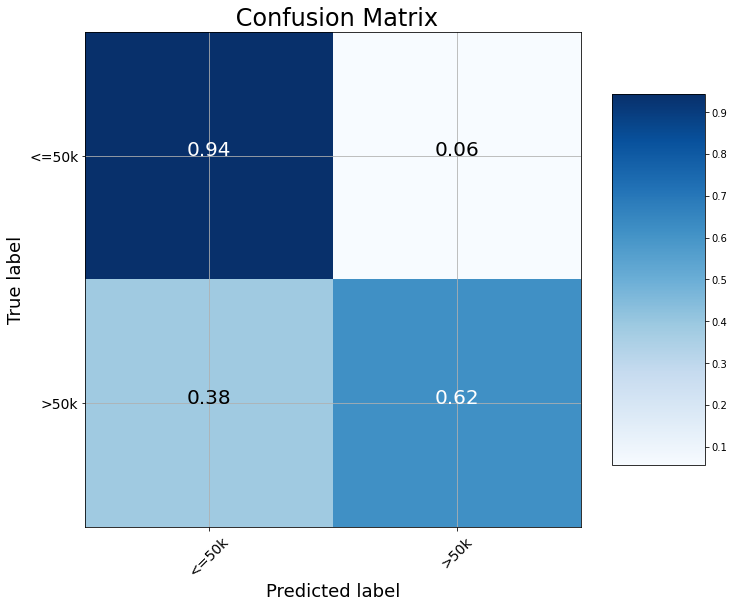

In [127]:
# TO PRINT FINAL RESULTS
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y, results_5)
plot_confusion_matrix(cm, classes = ['<=50k', '>50k'],
                      title = ' Confusion Matrix')

plt.savefig('cm.png')


#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Print out confusion matrix
cmat = confusion_matrix(y, results_5)
print("TN:", format(cmat[0,0])," FP:", format(cmat[0,1]),  " FN:", format(cmat[1,0]), " TN:", format(cmat[1,1]), 
          " FNR=", format(cmat[1,0]/(cmat[1,0]+cmat[0,0])),  " FPR=", format(cmat[0,1]/(cmat[0,1]+cmat[1,1])))

print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))